# <center> Breast Cancer Tumor Cell Type Detection
## <center> A comparision of Random Forest(RF) and K-nearest neighbour(KNN) Model
### <center> By Manish Joshi


<br>
<br>

![Sample Image](cell_image.jpg)

Breast cancer is a significant health concern, impacting the lives of millions of individuals globally. Early detection and accurate classification of breast masses are pivotal for timely medical intervention and patient care. To aid in the research and development of breast cancer detection and classification models, we present the Breast Cancer Tumor Classification Dataset.

## Dataset Overview

This dataset encompasses vital information derived from fine needle aspirate biopsy slides of breast masses, totaling 569 instances. These biopsies are classified into two distinct categories: **malignant** (cancerous) and **benign** (non-cancerous). The dataset comprises 30 features, each corresponding to various properties of cell nuclei, including size, shape, and regularity. These features are further categorized into three sets, representing the **mean**, **standard error**, and **worst** values of ten nuclear parameters.

### Feature Attributes

The following attributes are included in this dataset:

- **Radius**: Measures the mean, standard error, and worst (largest) radius of the tumor cells.
- **Texture**: Represents the mean, standard error, and worst (most severe) texture of the tumor cells (standard deviation of grayscale values).
- **Perimeter**: Captures the mean, standard error, and worst (largest) perimeter of the tumor cells.
- **Area**: Records the mean, standard error, and worst (largest) area of the tumor cells.
- **Smoothness**: Measures the mean, standard error, and worst (most severe) smoothness of the tumor cells (local variation in radius lengths).
- **Compactness**: Indicates the mean, standard error, and worst (most severe) compactness of the tumor cells (perimeter^2/area - 1).
- **Concavity**: Reflects the mean, standard error, and worst (most severe) concavity of the tumor cells (severity of concave portions of the contour).
- **Concave Points**: Represents the mean, standard error, and worst (most severe) number of concave portions of the contour of the tumor cells.
- **Symmetry**: Measures the mean, standard error, and worst (most severe) symmetry of the tumor cells.
- **Fractal Dimension**: Captures the mean, standard error, and worst (most severe) "coastline approximation" of the tumor cells.


### 1. Imports Libraries / Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [5]:
df = pd.read_csv("./brcaw.csv")
RESULTS_DF = pd.DataFrame({"Metrics": ["Accuracy", "Precision", "Recall","F1 Score","ROC AUC","n_estimators","max_tree_depth","n_neighbour"]})

### 2. Data Visualization and Exploration

In [6]:
# Data preview
df.head(2)

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,19.26,99.70,711.2,0.1440,0.1773,0.239,0.12880,0.2977,0.07259,B
1,2,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183,B


Given data contain total 32 columns including index column

There are zero null data present in dataset

1) Drop "index" column which is not required

2) Traget data given as categorical data so convert into numeric data
    
    0 : (B)enign and 1 : (M)alignant

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df['y'] = df['y'].map({'B': 0, 'M': 1})
df.head(2)

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.1440,0.1773,0.239,0.12880,0.2977,0.07259,0
1,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183,0


* Plot mean difference of all features for both type to indentify range difference between to type

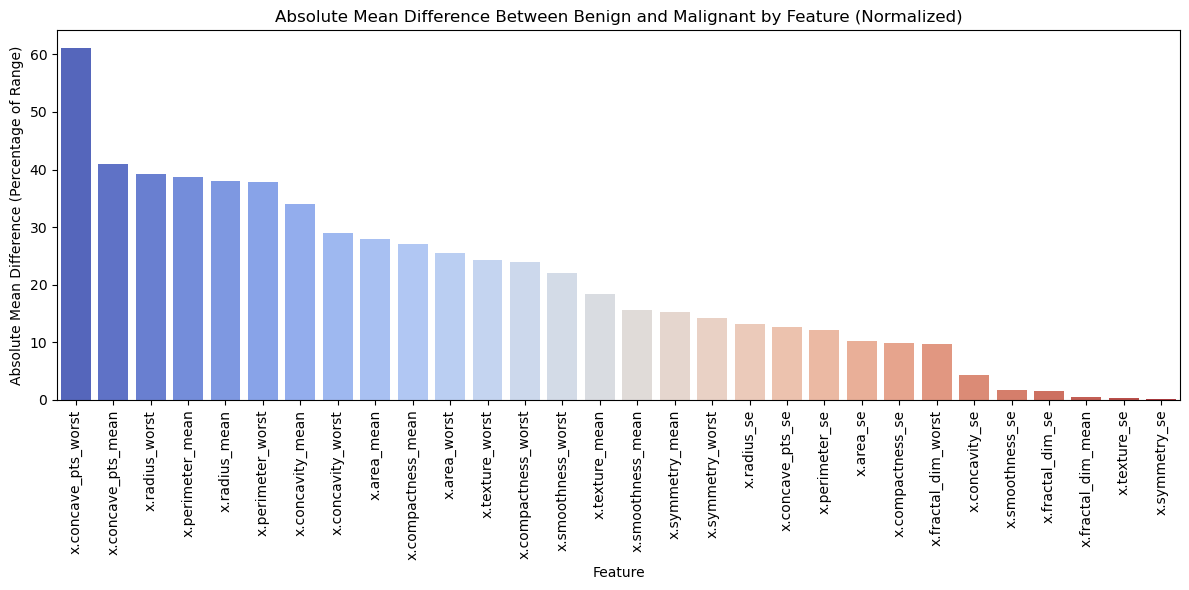

                                 Feature  Mean_Diff
x.concave_pts_worst  x.concave_pts_worst  61.109280
x.concave_pts_mean    x.concave_pts_mean  40.893252
x.radius_worst            x.radius_worst  39.224544
x.perimeter_mean        x.perimeter_mean  38.630061
x.radius_mean              x.radius_mean  38.020577
x.perimeter_worst      x.perimeter_worst  37.769105
x.concavity_mean        x.concavity_mean  33.939901
x.concavity_worst      x.concavity_worst  29.022709
x.area_mean                  x.area_mean  27.928237
x.compactness_mean    x.compactness_mean  27.007146
x.area_worst                x.area_worst  25.593839


In [9]:
mean_values = df.groupby('y').mean()
mean_values = mean_values.transpose()
parameters = df.iloc[:, :-1].copy()
feature_ranges = parameters.max() - parameters.mean()
mean_diff = abs(mean_values.iloc[:][0] - mean_values.iloc[:][1])/feature_ranges*100
mean_diff_df = pd.DataFrame({'Feature': parameters.columns, 'Mean_Diff': mean_diff})
mean_diff_df = mean_diff_df.sort_values(by='Mean_Diff', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=mean_diff_df, x='Feature', y='Mean_Diff', palette='coolwarm')
plt.title('Absolute Mean Difference Between Benign and Malignant by Feature (Normalized)')
plt.xlabel('Feature')
plt.ylabel('Absolute Mean Difference (Percentage of Range)')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

print(mean_diff_df[mean_diff_df["Mean_Diff"] > 25])

From above graphs it is clearly visible that "concave_pts", "radius", "parimeter" and "concave_pts" has significant difference in mean value for both type.

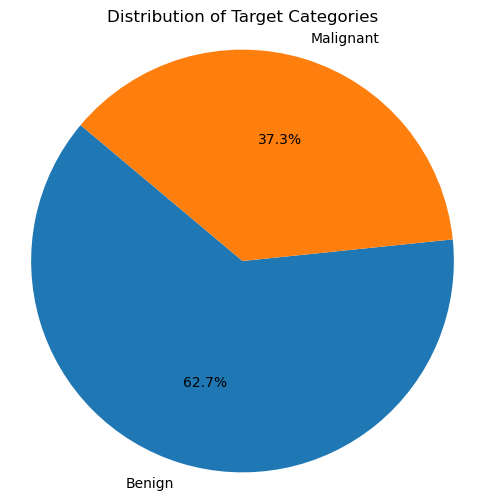

In [10]:
# Checking Imbalance
target_counts = df['y'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=["Benign","Malignant"], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

* There is a slight imbalance in the dataset.
* Majority cancer cells are benign.
* Ratio of Malignant to Benign cells is about 2:5


#### Check Correlation of each feature with cell type

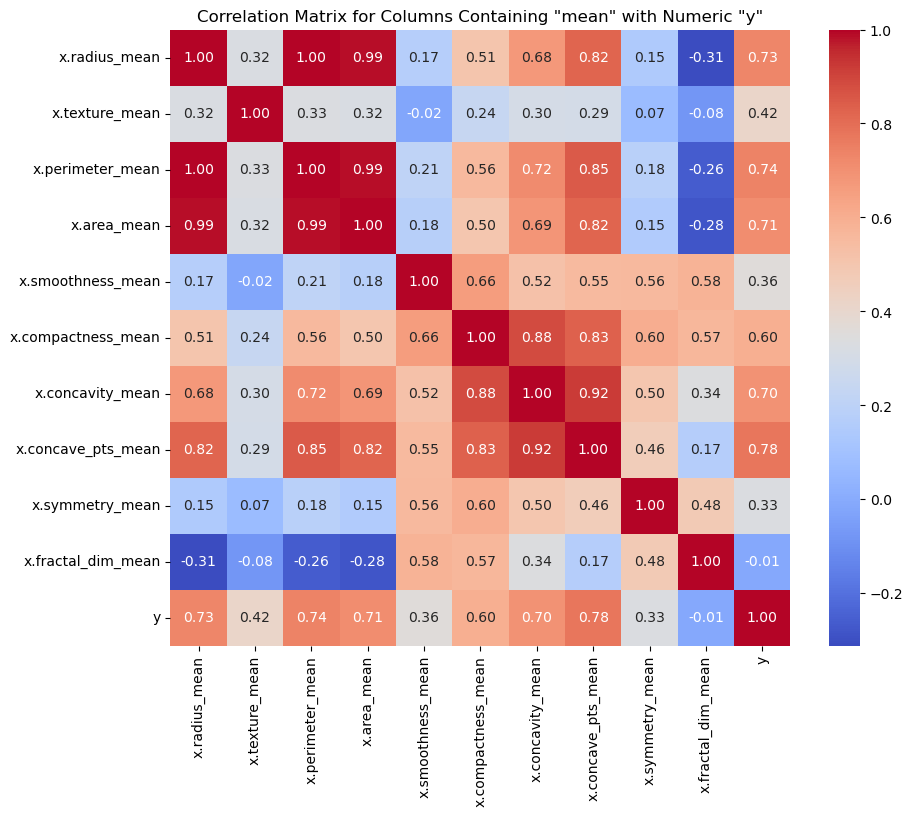

y                     1.000000
x.concave_pts_mean    0.776614
x.perimeter_mean      0.742636
x.radius_mean         0.730029
x.area_mean           0.708984
x.concavity_mean      0.696360
x.compactness_mean    0.596534
x.texture_mean        0.415185
x.smoothness_mean     0.358560
x.symmetry_mean       0.330499
x.fractal_dim_mean   -0.012838
Name: y, dtype: float64


In [11]:

# Select columns that contain "mean" in their names
mean_columns = [col for col in df.columns if 'mean' in col]

# Create a DataFrame with only the selected columns and the numeric 'y' column
data_for_correlation = df[mean_columns + ['y']]

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Columns Containing "mean" with Numeric "y"')
plt.show()

charges_corr = correlation_matrix['y']  # or corr_matrix.loc[:, 'charges']

# Print the correlations
print(charges_corr.sort_values(ascending=False))

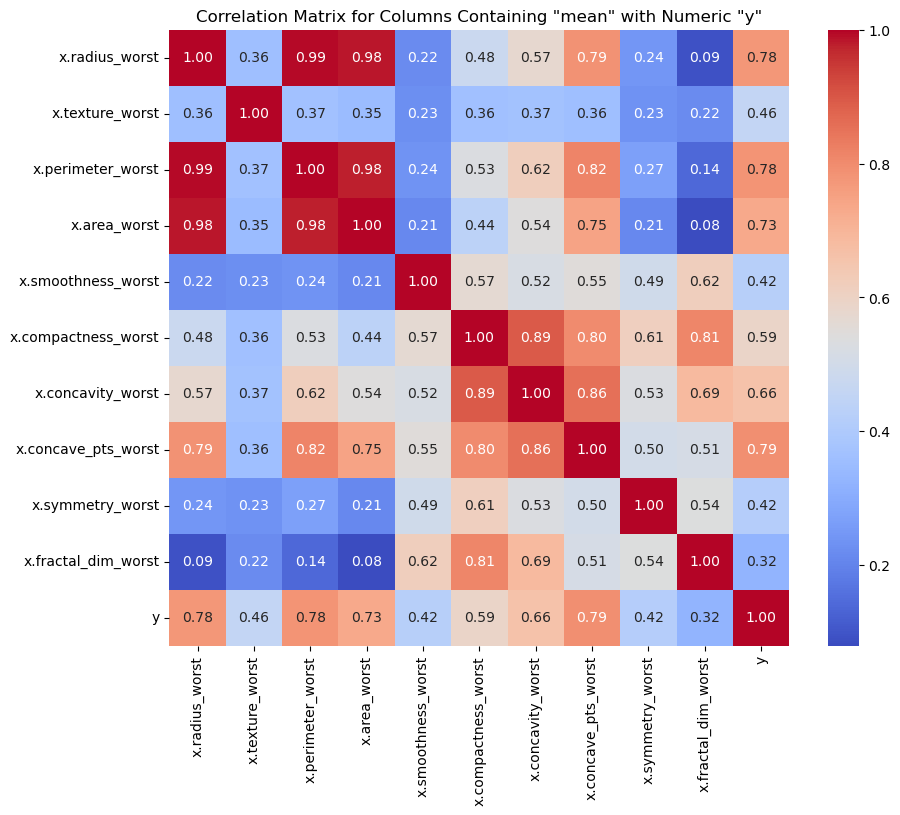

y                      1.000000
x.concave_pts_worst    0.793566
x.perimeter_worst      0.782914
x.radius_worst         0.776454
x.area_worst           0.733825
x.concavity_worst      0.659610
x.compactness_worst    0.590998
x.texture_worst        0.456903
x.smoothness_worst     0.421465
x.symmetry_worst       0.416294
x.fractal_dim_worst    0.323872
Name: y, dtype: float64


In [12]:
# Select columns that contain "mean" in their names
mean_columns = [col for col in df.columns if 'worst' in col]

# Create a DataFrame with only the selected columns and the numeric 'y' column
data_for_correlation = df[mean_columns + ['y']]

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Columns Containing "mean" with Numeric "y"')
plt.show()

charges_corr = correlation_matrix['y']  # or corr_matrix.loc[:, 'charges']

# Print the correlations
print(charges_corr.sort_values(ascending=False))



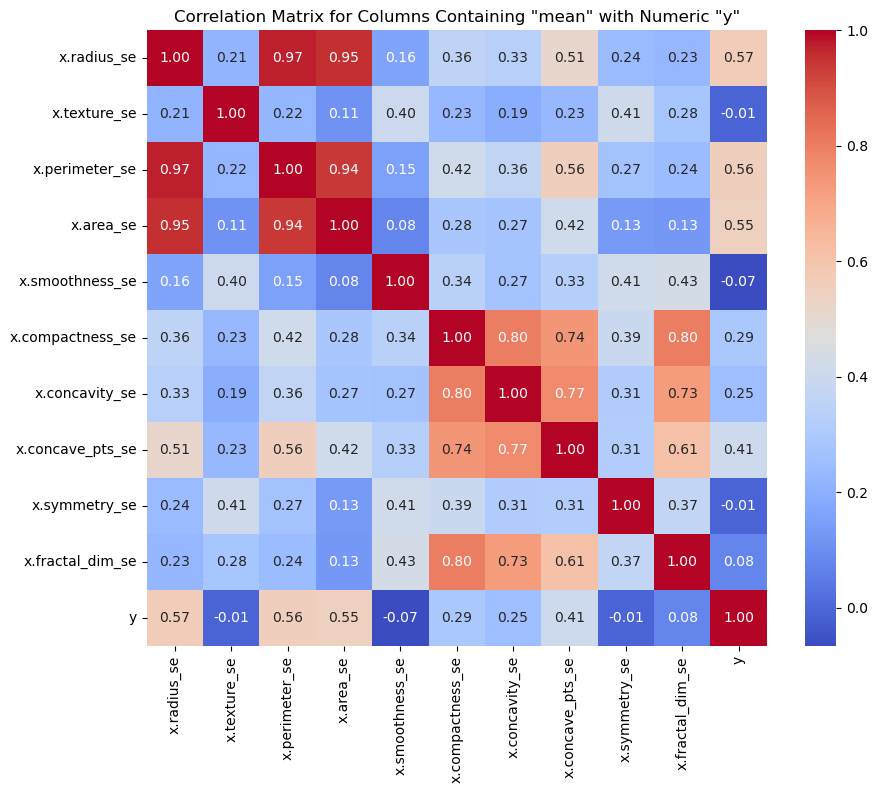

y                   1.000000
x.radius_se         0.567134
x.perimeter_se      0.556141
x.area_se           0.548236
x.concave_pts_se    0.408042
x.compactness_se    0.292999
x.concavity_se      0.253730
x.fractal_dim_se    0.077972
x.symmetry_se      -0.006522
x.texture_se       -0.008303
x.smoothness_se    -0.067016
Name: y, dtype: float64


In [13]:
# Select columns that contain "mean" in their names
mean_columns = [col for col in df.columns if 'se' in col]

# Create a DataFrame with only the selected columns and the numeric 'y' column
data_for_correlation = df[mean_columns + ['y']]

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Columns Containing "mean" with Numeric "y"')
plt.show()

charges_corr = correlation_matrix['y']  # or corr_matrix.loc[:, 'charges']

# Print the correlations
print(charges_corr.sort_values(ascending=False))



* From above correlation matrix graphs, "radius", "parameter" and "area" are highly correlated features
* All standard_error features are less correlated to target compare to worst and mean values

#### Feature Importance

Text(0.5, 0, 'Feature Importance')

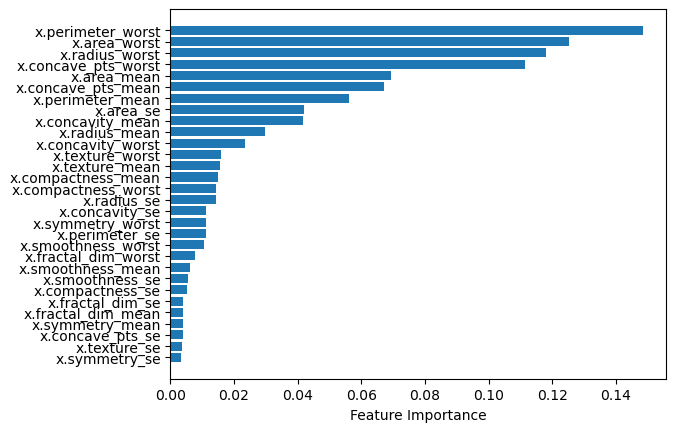

In [16]:
df_copy = df.copy()

seed = 186
B_dataset = df_copy[df_copy['y']==0]
M_dataset = df_copy[df_copy['y']==1]

B_train,B_test = train_test_split(B_dataset, test_size=0.2, random_state=seed)
M_train,M_test = train_test_split(M_dataset, test_size=0.2, random_state=seed)

train_data = pd.concat([B_train, M_train], ignore_index=True)
test_data = pd.concat([B_test, M_test], ignore_index=True)
X_train = train_data.drop(['y'],axis=1)
y_train = train_data['y']
X_test = test_data.drop(['y'],axis=1)
y_test = train_data['y']

rf = RandomForestClassifier(n_estimators=150,random_state=65)
rf.fit(X_train, y_train)
sort = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")


* Let's take top 15 highly important columns

In [ ]:
highly_important_columns = X_train.columns[sort][-15:].copy().to_list()
highly_important_columns

#### K-Fold Cross Validation

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

# Define hyperparameter grid for Random Forest Classifier
hyper_params = [{'n_features_to_select': list(range(1, len(X_train.columns) + 1))}]

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=65, n_estimators=15, bootstrap=False)

# Fit the classifier
rf_classifier.fit(X_train, y_train)

# Create RFE object
rfe = RFE(estimator=rf_classifier)

# Create GridSearchCV for classification
model_cv = GridSearchCV(estimator=rfe, param_grid=hyper_params, scoring='accuracy', cv=kf, verbose=1, return_train_score=True)

# Fit the GridSearchCV model
model_cv.fit(X_train, y_train)

# Convert results to a DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)

# Plot the results
plt.figure(figsize=(16, 6))
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])
plt.xlabel('number of features')
plt.ylabel('Accuracy')
plt.title('Optimal Number of Features')
plt.legend(['test score', 'train score'])
plt.show()

* We can take the number of features to be 10 as there is not substantial increase in score later.

#### Highly correlated features

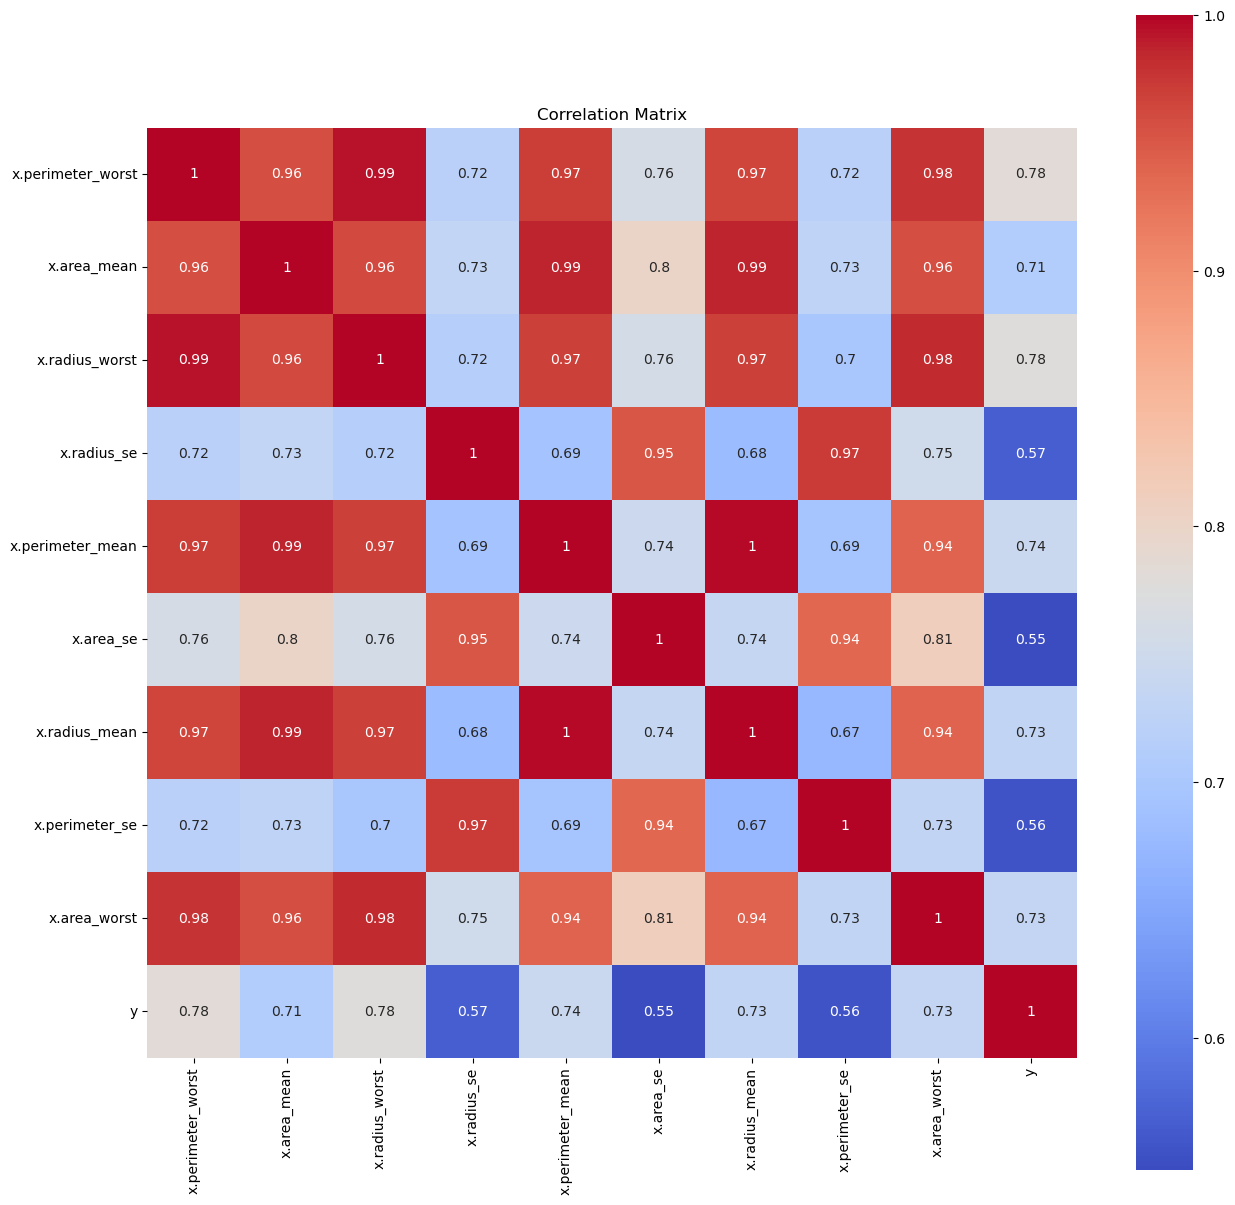

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the target columns based on correlations greater than 0.9
target_columns = []
for col in correlation_matrix.columns:
    high_corr_cols = correlation_matrix.index[(correlation_matrix[col] > 0.95) & (correlation_matrix[col] < 1.0)]
    target_columns.extend(high_corr_cols)

# Deduplicate the list of target columns
target_columns = list(set(target_columns))
target_columns.append('y')
corr_matrix = df[target_columns].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

* All standard_error(se) data is not correlated to target so drop them all.
* Perimeter, area and radius are highly correlated, so drop radius and area
* fractal_dimension also dont show any correlation to target so drop them also.

### 3. Data Pre-processing and Cleaning

In [18]:
all_se_features = [col for col in df.columns if "se" in col]
others_to_drop = ["x.radius_mean","x.area_mean","x.radius_worst","x.area_worst","x.fractal_dim_mean","x.fractal_dim_worst"]
all_se_features.extend(others_to_drop)
final_df = df.drop(all_se_features, axis=1)
final_df.head(5)

,x.texture_mean,x.perimeter_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.texture_worst,x.perimeter_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,y
0,14.36,87.46,0.09779,0.08129,0.06664,0.047810,0.1885,19.26,99.70,0.14400,0.17730,0.23900,0.12880,0.2977,0
1,15.71,85.63,0.10750,0.12700,0.04568,0.031100,0.1967,20.49,96.09,0.13120,0.27760,0.18900,0.07283,0.3184,0
2,12.44,60.34,0.10240,0.06492,0.02956,0.020760,0.1815,15.66,65.13,0.13240,0.11480,0.08867,0.06227,0.2450,0
3,18.42,82.61,0.08983,0.03766,0.02562,0.029230,0.1467,22.81,84.46,0.09701,0.04619,0.04833,0.05013,0.1987,0
4,16.84,51.71,0.08600,0.05943,0.01588,0.005917,0.1769,21.96,57.26,0.12970,0.13570,0.06880,0.02564,0.3105,0


In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.texture_mean       569 non-null    float64
 1   x.perimeter_mean     569 non-null    float64
 2   x.smoothness_mean    569 non-null    float64
 3   x.compactness_mean   569 non-null    float64
 4   x.concavity_mean     569 non-null    float64
 5   x.concave_pts_mean   569 non-null    float64
 6   x.symmetry_mean      569 non-null    float64
 7   x.texture_worst      569 non-null    float64
 8   x.perimeter_worst    569 non-null    float64
 9   x.smoothness_worst   569 non-null    float64
 10  x.compactness_worst  569 non-null    float64
 11  x.concavity_worst    569 non-null    float64
 12  x.concave_pts_worst  569 non-null    float64
 13  x.symmetry_worst     569 non-null    float64
 14  y                    569 non-null    int64  
dtypes: float64(14), int64(1)
memory usage: 6

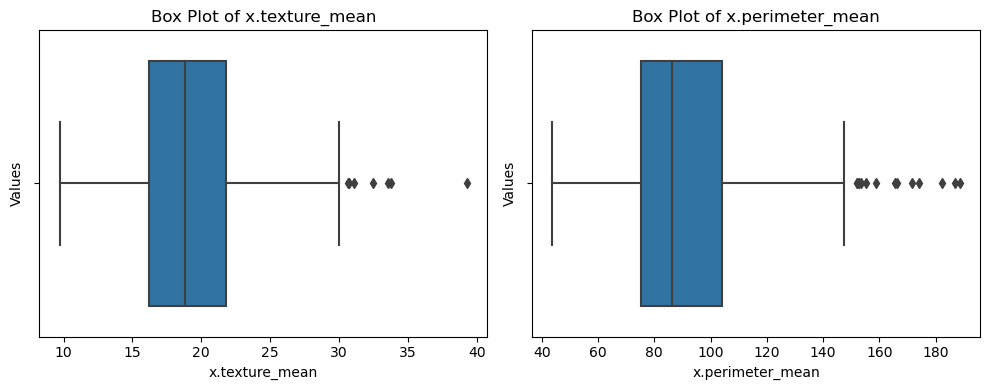

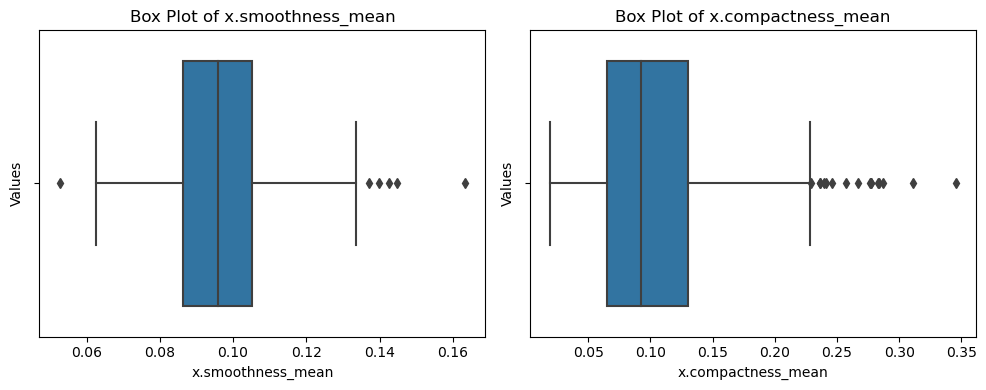

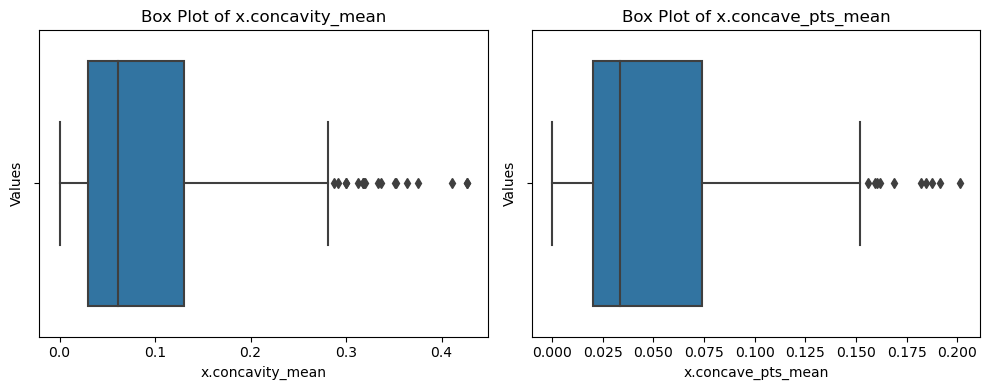

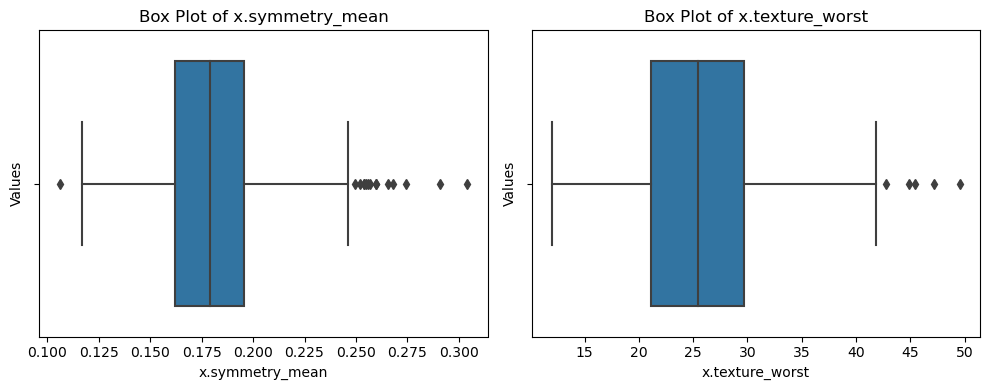

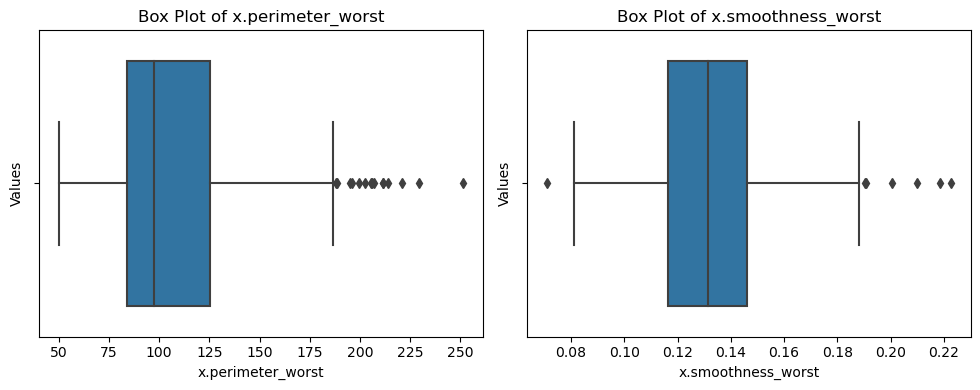

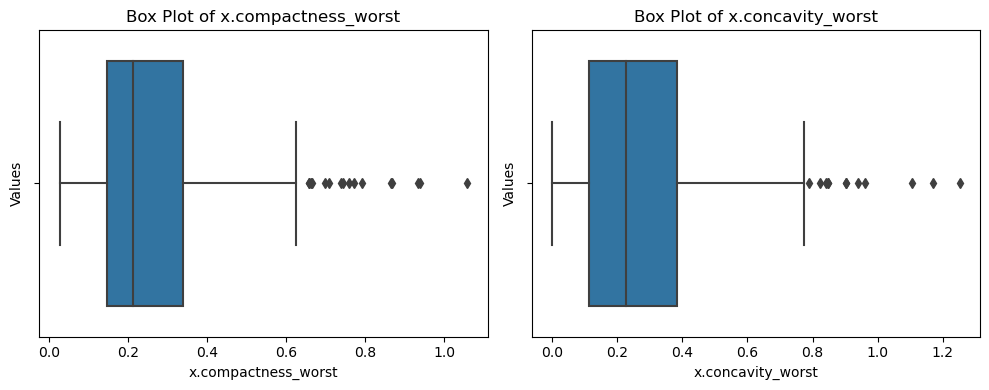

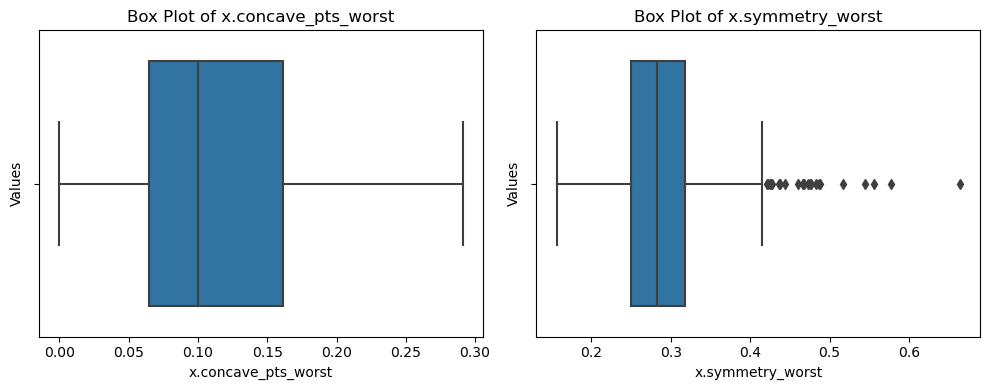

In [20]:
columns_for_boxplots = final_df.columns[:-1]  # Exclude the target column

# Calculate the number of rows and columns for the subplots
num_columns = 2  # Two columns per row
num_rows = (len(columns_for_boxplots) + num_columns - 1) // num_columns  # Calculate the number of rows

# Loop through each column to create individual figures with box plots
for i, column in enumerate(columns_for_boxplots):
    if i % num_columns == 0:
        # Create a new figure for each row
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.boxplot(x=final_df[column], ax=axes[i % num_columns])
    axes[i % num_columns].set_title(f'Box Plot of {column}')
    axes[i % num_columns].set_xlabel(column)
    axes[i % num_columns].set_ylabel("Values")
    
    if i % num_columns == num_columns - 1 or i == len(columns_for_boxplots) - 1:
        # Save or show the row of figures when it's complete
        plt.tight_layout()
        plt.show()


* All the features contain ouliers except concave_pts_worst, but that may providing inportant information about feature. Because data size is small and they may be not outlier in population

#### Scaling
* For Random Forest, scaling is not required.
* For KNN, scaling is required as we consider the distance between the points. Scaling ensures that no single feature dominates the distance calculation.
* We will go forward with min-max scaling as it keeps the values in the fixed range.

In [21]:
feature_cols = [ col for col in final_df.columns if col != "y"]
scaler = MinMaxScaler()
final_df[feature_cols] = scaler.fit_transform(final_df[feature_cols])
final_df.sample(5)

,x.texture_mean,x.perimeter_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.texture_worst,x.perimeter_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,y
170,0.246534,0.240550,0.207096,0.046500,0.031443,0.084443,0.208081,0.218284,0.156133,0.085320,0.019239,0.017867,0.097320,0.066233,0
429,0.354751,0.845899,0.831182,0.819950,1.000000,1.000000,0.805556,0.319030,0.649883,0.650003,0.385278,0.463498,0.772509,0.326631,1
394,0.393642,0.194251,0.632572,0.314153,0.244611,0.281759,0.421717,0.621535,0.183326,0.790662,0.235284,0.321326,0.489347,0.275774,1
189,0.170105,0.352982,0.326081,0.179191,0.107966,0.175348,0.232828,0.157516,0.317695,0.335667,0.168437,0.171805,0.429897,0.304356,0
413,0.514034,0.882524,0.484517,0.757990,0.782334,0.916998,0.388384,0.575693,0.803277,0.568778,0.563020,0.517252,0.985223,0.155726,1


* We have applied the min-max scaling and the data-points are in 0-1 range.

### Model Building

#### Train-Test Split

Data for both type of cell splited individually to maintain ration in train and test dataset equally

In [22]:
def training_testing_data(df,rate = 0.2):
    seed = 186
    B_dataset = df[df['y']==0]
    M_dataset = df[df['y']==1]

    B_train,B_test = train_test_split(B_dataset, test_size=rate, random_state=seed)
    M_train,M_test = train_test_split(M_dataset, test_size=rate, random_state=seed)

    train_data = pd.concat([B_train, M_train], ignore_index=True)
    test_data = pd.concat([B_test, M_test], ignore_index=True)
    
    return train_data, test_data
# Splitting the dataset into training and test sets (80-20)

train_data_80, test_data_20= training_testing_data(final_df,0.2)
train_data_20, test_data_80 = training_testing_data(final_df,0.8)

#### Random Forest

In [23]:
def get_X_and_Y(dataset):
    X = dataset.drop(['y'],axis=1).copy()
    y = dataset['y']
    return X, y
def plot_confusion_matrix(actual, predicted, title=None):
    conf_matrix = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    if title != None:
        plt.title(f'Confusion Matrix of {title}')
    else:
        plt.title(f'Confusion Matrix')
    plt.show()

def RandomForestModel(train_data,test_data,matrix_type = "accuracy",bootstrap = False):
    X_train, y_train = get_X_and_Y(train_data)
    X_test, y_test = get_X_and_Y(test_data)
    rf_classifier = RandomForestClassifier(random_state=65,bootstrap=bootstrap)
    
    param_grid_rf = {
        'n_estimators': [10, 20, 30, 50, 100, 200],
        'max_depth': [2, 5, 10, 20, 30, 50],
        # Add more hyperparameters to tune as needed
    }

    # Perform hyperparameter tuning using cross-validation (5-fold cross-validation in this example)
    grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring=matrix_type, n_jobs=-1)
    grid_search_rf.fit(X_train, y_train)

    # Get the best hyperparameters
    best_rf_params = grid_search_rf.best_params_

    final_rf_classifier = RandomForestClassifier( **best_rf_params)

    # Fit the final Random Forest model to the training data
    final_rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    rf_predictions = final_rf_classifier.predict(X_test)

    rf_accuracy = accuracy_score(y_test, rf_predictions)
    rf_precision = precision_score(y_test, rf_predictions)
    rf_recall = recall_score(y_test, rf_predictions)
    rf_f1 = f1_score(y_test, rf_predictions)
    rf_roc_auc = roc_auc_score(y_test, rf_predictions)

    print("Random Forest Metrics:")
    print(f"Accuracy: {rf_accuracy:.4f}")
    print(f"Precision: {rf_precision:.4f}")
    print(f"Recall: {rf_recall:.4f}")
    print(f"F1 Score: {rf_f1:.4f}")
    print(f"ROC AUC: {rf_roc_auc:.4f}")
    estimators = best_rf_params["n_estimators"]
    max_depths = best_rf_params["max_depth"]
    print(f'n_estimaters: {estimators} and max_depths: {max_depths}')

    plot_confusion_matrix(y_test,rf_predictions,"Random Forest")

    return [rf_accuracy,rf_precision,rf_recall,rf_f1,rf_roc_auc,estimators,max_depths,None]

Random Forest Metrics:
Accuracy: 0.9739
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647
ROC AUC: 0.9698
n_estimaters: 200 and max_depths: 10


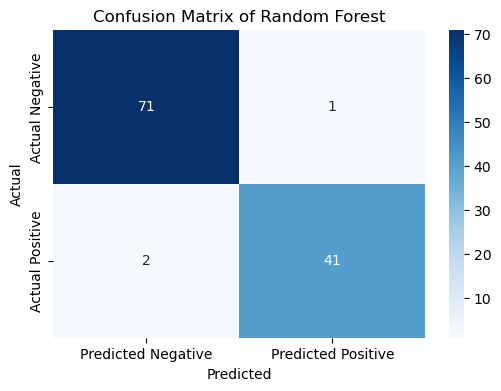

Random Forest Metrics:
Accuracy: 0.9320
Precision: 0.9017
Recall: 0.9176
F1 Score: 0.9096
ROC AUC: 0.9291
n_estimaters: 20 and max_depths: 5


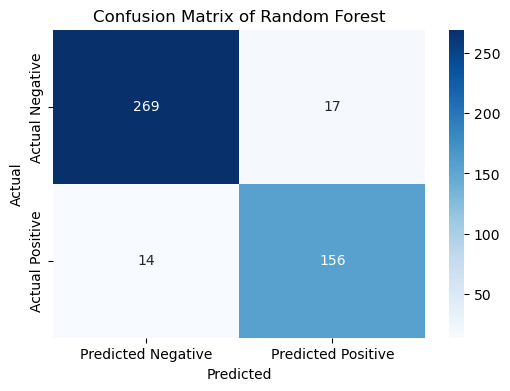

In [25]:
RF_with_featurs = RandomForestModel(train_data_80,test_data_20)
result1 = pd.DataFrame({"RF_with_80_20": RF_with_featurs})
RF_with_featurs = RandomForestModel(train_data_20,test_data_80)
result2 = pd.DataFrame({"RF_with_20_80": RF_with_featurs})
RESULTS_DF = pd.concat([RESULTS_DF, result1, result2], axis=1)


#### KNN Model

In [26]:
def KNeighbourClassifier(train_data,test_data, matrix_type = "accuracy"):
    X_train, y_train = get_X_and_Y(train_data)
    X_test, y_test = get_X_and_Y(test_data)
    
    knn_classifier = KNeighborsClassifier()
   
    param_grid_knn = {
        'n_neighbors': range(1, 15),  # Trying different values of k
    }

    # Perform hyperparameter tuning using cross-validation (5-fold cross-validation)
    grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring=matrix_type, n_jobs=-1)
    grid_search_knn.fit(X_train, y_train)

    best_knn_params = grid_search_knn.best_params_

    # Create the final K-Nearest Neighbors classifier with the best hyperparameters
    final_knn_classifier = KNeighborsClassifier(**best_knn_params)
   

    # Fit the final KNN model to the training data
    final_knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    knn_predictions = final_knn_classifier.predict(X_test)

    # Calculate evaluation metrics for the KNN model
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_precision = precision_score(y_test, knn_predictions)
    knn_recall = recall_score(y_test, knn_predictions)
    knn_f1 = f1_score(y_test, knn_predictions)
    knn_roc_auc = roc_auc_score(y_test, knn_predictions)
    n = best_knn_params["n_neighbors"]
    print("\nK-Nearest Neighbors Metrics:")
    print(f"Accuracy: {knn_accuracy:.4f}")
    print(f"Precision: {knn_precision:.4f}")
    print(f"Recall: {knn_recall:.4f}")
    print(f"F1 Score: {knn_f1:.4f}")
    print(f"ROC AUC: {knn_roc_auc:.4f}")
    print(f'n_neighbors: {n}')
    plot_confusion_matrix(y_test,knn_predictions,"K-Nearest Neighbors")
     
    return [knn_accuracy,knn_precision,knn_recall,knn_f1,knn_roc_auc,None,None,n]



K-Nearest Neighbors Metrics:
Accuracy: 0.9826
Precision: 0.9767
Recall: 0.9767
F1 Score: 0.9767
ROC AUC: 0.9814
n_neighbors: 7


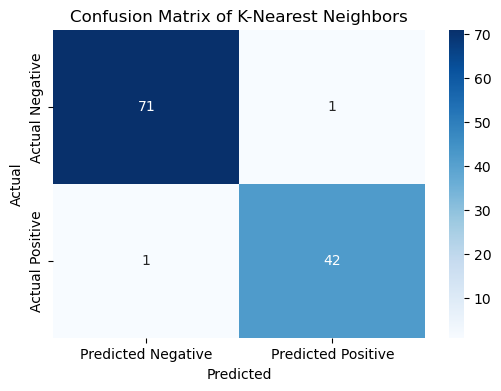


K-Nearest Neighbors Metrics:
Accuracy: 0.9539
Precision: 0.9806
Recall: 0.8941
F1 Score: 0.9354
ROC AUC: 0.9418
n_neighbors: 10


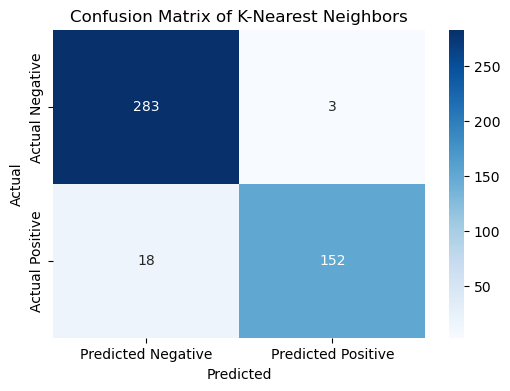

In [27]:
KNN_with_featurs = KNeighbourClassifier(train_data_80,test_data_20)
result1 = pd.DataFrame({"KNN_with_80_20": KNN_with_featurs})
KNN_with_featurs = KNeighbourClassifier(train_data_20,test_data_80)
result2 = pd.DataFrame({"KNN_with_20_80": KNN_with_featurs})
RESULTS_DF = pd.concat([RESULTS_DF, result1, result2], axis=1)

In [28]:
RESULTS_DF.set_index("Metrics",inplace=True)
RESULTS_DF.head(10)

,RF_with_80_20,RF_with_20_80,KNN_with_80_20,KNN_with_70_30
Metrics,,,,
Accuracy,0.973913,0.932018,0.982609,0.953947
Precision,0.976190,0.901734,0.976744,0.980645
Recall,0.953488,0.917647,0.976744,0.894118
F1 Score,0.964706,0.909621,0.976744,0.935385
ROC AUC,0.969800,0.929103,0.981428,0.941814
n_estimators,200.000000,20.000000,NaN,NaN
max_tree_depth,10.000000,5.000000,NaN,NaN
n_neighbour,NaN,NaN,7.000000,10.000000


# Conclusion on KNN and Random Forest Models with Different Train and Test Data Sizes

In this analysis, we evaluated the performance of K-Nearest Neighbors (KNN) and Random Forest (RF) models with varying train and test data sizes, specifically with an 80-20 split and a 70-30 split. We focused on two key aspects: **accuracy** and **runtime**. Let's draw conclusions based on the generated data:

## Accuracy Comparison:

### Random Forest (RF) Model:

- **80-20 Split:** The RF model achieved an impressive accuracy of approximately 97.39%, indicating that it performed very well with a larger training dataset.
- **20-80 Split:** When the training dataset was reduced to 20%, the accuracy dropped slightly to around 93.20%. This decrease in accuracy suggests that a smaller training dataset might hinder the RF model's performance.

### K-Nearest Neighbors (KNN) Model:

- **80-20 Split:** The KNN model performed exceptionally well with an accuracy of approximately 98.26%. It showcased the ability to make accurate predictions with a larger training dataset.
- **20-80 Split:** When the training dataset was reduced to 20%, the KNN model maintained a high accuracy of around 95.39%. This indicates that the KNN model is more robust to variations in training dataset size compared to RF. 

## Overall Summary:

1. **Accuracy:** The KNN model consistently outperformed the RF model in terms of accuracy, regardless of the train-test split size. KNN showed higher accuracy with both the 80-20 and 20-80 splits.Both model shows accuracy more than 90% even for 20-80 split, which shows that models are not overfit

2. **Train-Test Split Impact:** Both models demonstrated a slight decrease in accuracy when the training dataset was reduced to 20% (80-20 split). However, the KNN model maintained a high accuracy even with a smaller training dataset (20-80 split), suggesting its robustness.

3. **Runtime:** The computation cost of KNN model is lesser than RF model.

In conclusion, if our primary goal is to maximize accuracy, the KNN model appears to be a strong choice, especially when dealing with smaller training datasets. It also run more faster than RF model runtime.